In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
x1 = np.array([-1, -1, 1, -1, 1, -1, -1, 1])
x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])
x = np.stack((x1, x2, x3))

In [3]:
w = np.zeros((len(x1), len(x1)))
for i in range(len(x1)):
    for j in range(len(x1)):
        for m in range(3):
            w[i, j] += x[m][i] * x[m][j]

In [4]:
def sign(x):
    return (1, -1)[x < 0]

def update_rule(a, w):
    x = np.zeros(len(a))
    for i in range(len(a)):
        for j in range(len(a)):
            x[i] += w[i, j] * a[j]
    x = [sign(a) for a in x]
    return x

In [5]:
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])

## 3.1

In [6]:
# Test convergens patters
def find_attractor(x, w):
    prev = x

    while True:
        curr = update_rule(prev, w)
        if np.array_equal(curr, prev):
            break
        prev = curr
    return prev


In [7]:
def generate_combination():
    x = np.array([1, 1, 1, 1, -1, -1, -1, -1])
    np.random.shuffle(x)
    return x

def array_in(small, large):
    for array in large:
        if np.array_equal(small, array):
            return True
    return False

In [8]:
# How many attractors are there?

pool = []

for i in range(400):
    x = generate_combination()
    
    pattern = find_attractor(x)
    if not array_in(pattern, pool):
        pool.append(pattern)

print("There are", len(pool), "attractors")
print(pool)

TypeError: find_attractor() missing 1 required positional argument: 'w'

In [9]:
#More than half is wrong, what happens?
#Finds another attractor

pattern = [-1, -1, -1, 1, -1, 1, 1, 1]

find_attractor(pattern)

TypeError: find_attractor() missing 1 required positional argument: 'w'

### 3.2

In [10]:
def store_patterns():
    data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)
    return data
    #data = np.genfromtxt('pict.dat',
     #                dtype=None,
      #               delimiter=",")
    #patterns_pic = []
    
    #for i in range(1,12):
    #    img = np.zeros((32,32))
    #    for j in range(32):
    #        for k in range(32):
    #            
    #            img[j,k] = data[j*32+k]
    #    patterns_pic.append(img)
    #return patterns_pic
        


In [11]:
data = store_patterns()
#squeeze = imgs[0].ravel()


In [12]:
np.shape(data)

(11, 1024)

In [13]:
def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/(patterns.size)) * s
    return w

In [14]:
w_pics = init_weights(data[:3,:])

In [16]:
attra = find_attractor(data[0], w_pics)
print(np.array_equal(attra, data[0]))

attra = find_attractor(data[1], w_pics)
print(np.array_equal(attra, data[1]))

attra = find_attractor(data[2], w_pics)
print(np.array_equal(attra, data[2]))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


True
True
True


In [17]:
check_deg_pat = find_attractor(data[9], w_pics)
print(np.array_equal(check_deg_pat, data[0]))

#Can complete

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


True


In [19]:
check_deg_pat = find_attractor(data[10], w_pics)
print(np.array_equal(check_deg_pat, data[1]))

#Can't complete

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


False


In [82]:
#What happens if we select units randomly?

def random_units(w, data, pattern):
    
    dim = len(w) 
    itera = 0
    gen_pattern = np.zeros(len(w))
    
    while True:
        ind = np.random.randint(0,dim)
        #pred_rand = np.dot(w[ind], pattern)
      
        pred=0
    
        for j in range(dim):
            pred += w[ind,j] * pattern[j]
        
        pred_sign = sign(pred) 

        gen_pattern[ind] = pred_sign
        
        
        itera += 1
            
        if itera%100 == 0:
            e = energy(w, gen_pattern)
            print("energy for iteration", itera, "is", e)
            plt.imshow(gen_pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            
            
        for i in range(len(data)):
            if np.array_equal(gen_pattern, data[i]):
                print("pattern matched image:", i+1)
                print("found after iteration:", itera)
                e = energy(w, gen_pattern)
                print("energy for iteration", itera, "is", e)
                plt.imshow(gen_pattern.reshape(32,32),interpolation="nearest")
                plt.show()
                return
        
        

    
        
            
    
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


energy for iteration 100 is 37.58333333333033


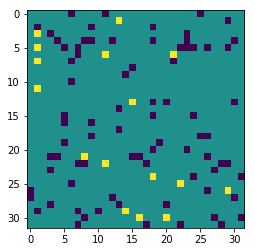

energy for iteration 200 is 73.914062500012


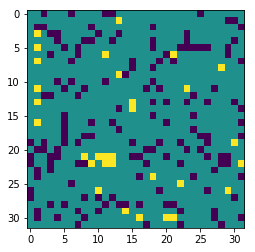

energy for iteration 300 is 106.54427083327097


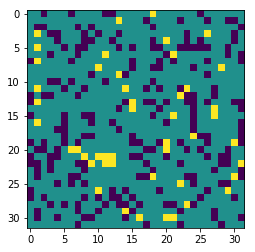

energy for iteration 400 is 130.3098958332291


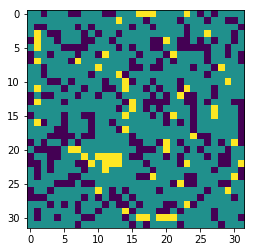

energy for iteration 500 is 154.33333333329907


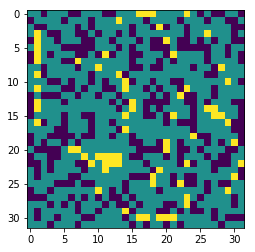

energy for iteration 600 is 175.34895833338015


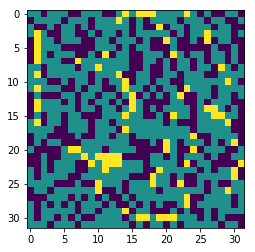

energy for iteration 700 is 195.5911458334801


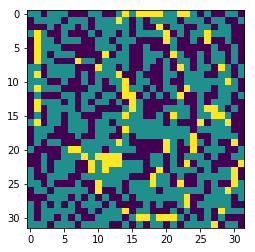

energy for iteration 800 is 214.53125000025668


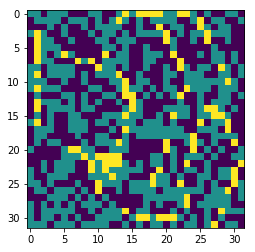

energy for iteration 900 is 232.25781250035945


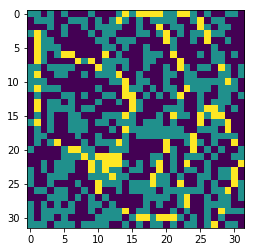

energy for iteration 1000 is 254.05729166712263


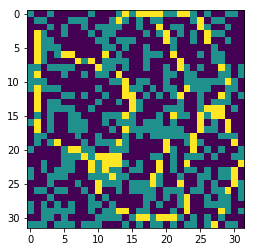

energy for iteration 1100 is 264.8463541670759


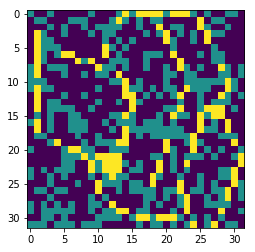

energy for iteration 1200 is 280.8437500002773


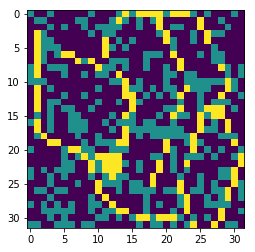

energy for iteration 1300 is 291.8307291668798


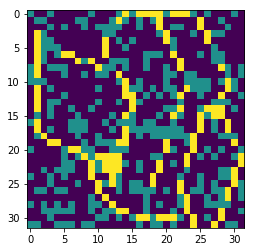

energy for iteration 1400 is 301.9348958334848


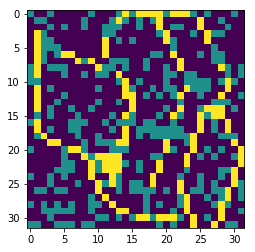

energy for iteration 1500 is 314.12500000011755


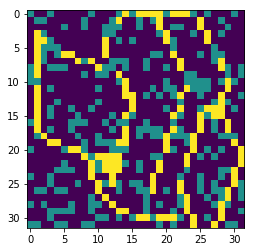

energy for iteration 1600 is 324.64062500002234


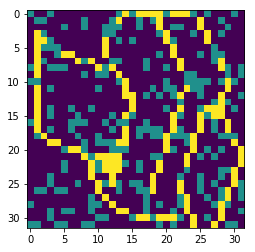

energy for iteration 1700 is 337.2187499999385


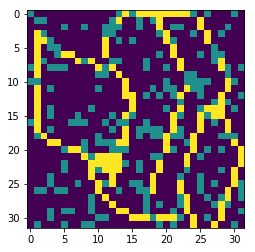

energy for iteration 1800 is 343.8906249998993


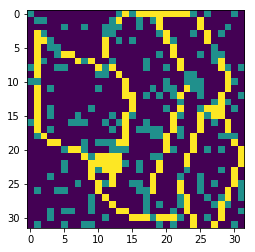

energy for iteration 1900 is 348.53906249982634


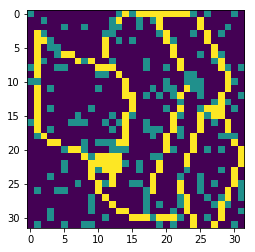

energy for iteration 2000 is 354.9531249997679


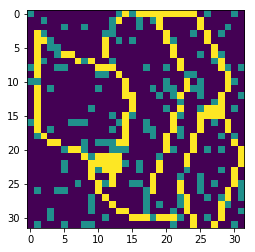

energy for iteration 2100 is 361.3828124997245


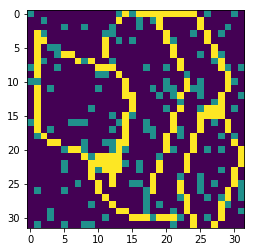

energy for iteration 2200 is 366.68489583293587


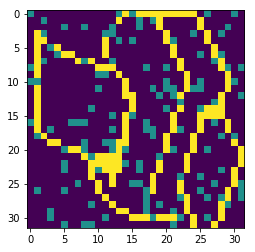

energy for iteration 2300 is 372.6276041662316


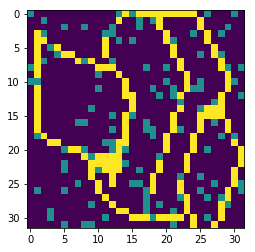

energy for iteration 2400 is 373.57291666621956


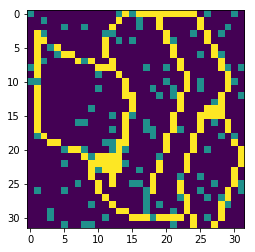

energy for iteration 2500 is 378.6328124995111


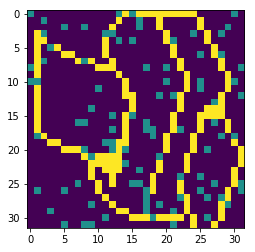

energy for iteration 2600 is 383.14062499947875


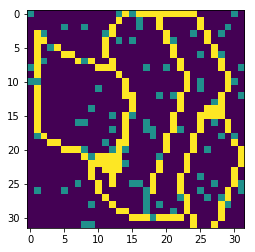

energy for iteration 2700 is 386.98437499945214


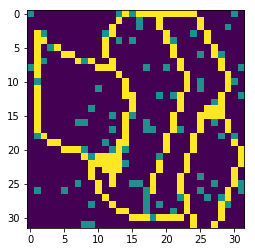

energy for iteration 2800 is 390.55729166608444


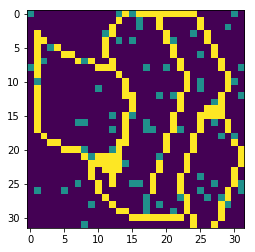

energy for iteration 2900 is 394.2708333326486


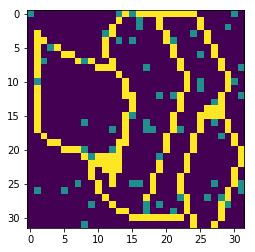

energy for iteration 3000 is 395.7812499992923


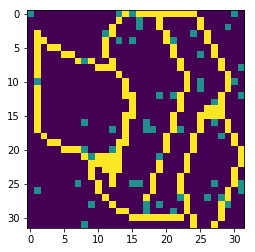

energy for iteration 3100 is 396.5624999992862


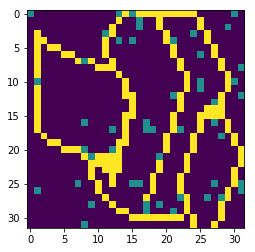

energy for iteration 3200 is 397.8437499992807


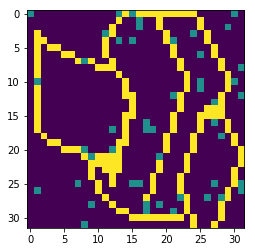

energy for iteration 3300 is 401.12239583257497


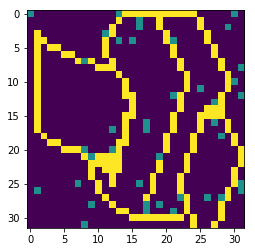

energy for iteration 3400 is 404.91406249920294


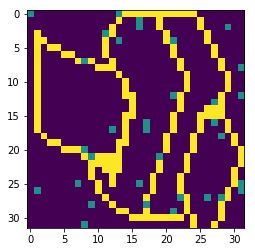

energy for iteration 3500 is 405.69531249918793


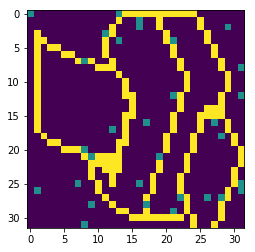

energy for iteration 3600 is 408.257812499153


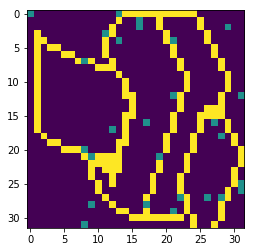

energy for iteration 3700 is 409.83333333246634


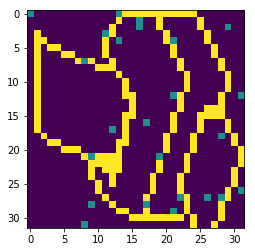

energy for iteration 3800 is 410.7552083324682


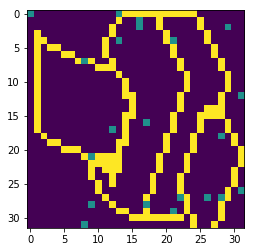

energy for iteration 3900 is 410.7552083324682


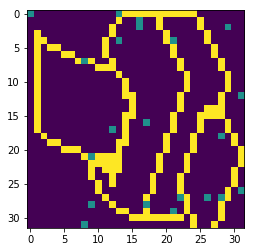

energy for iteration 4000 is 411.39583333246657


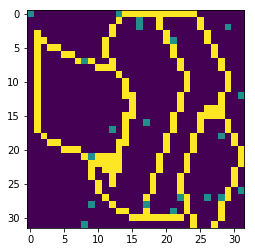

energy for iteration 4100 is 411.83072916580016


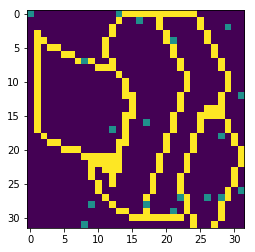

energy for iteration 4200 is 412.4713541657967


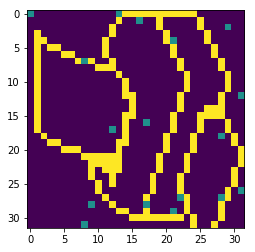

energy for iteration 4300 is 413.40624999912274


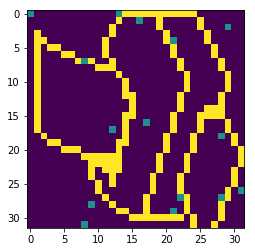

energy for iteration 4400 is 413.40624999912274


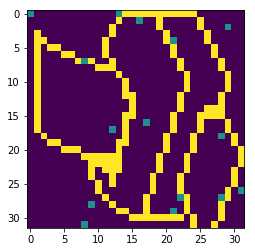

energy for iteration 4500 is 413.40624999912274


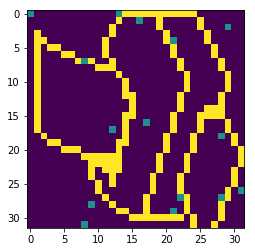

energy for iteration 4600 is 414.0468749991207


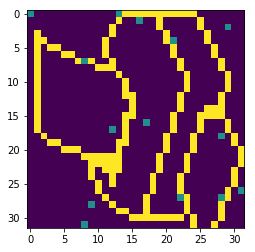

energy for iteration 4700 is 414.6874999991194


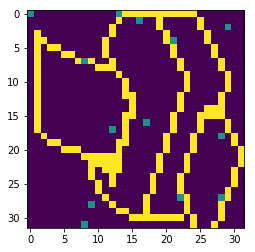

energy for iteration 4800 is 414.98177083244565


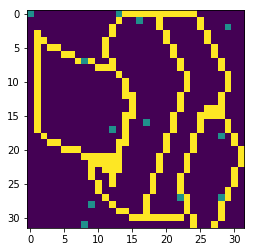

energy for iteration 4900 is 415.91666666576907


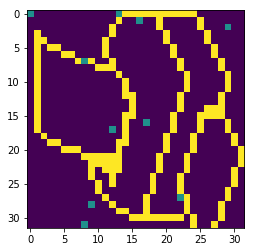

energy for iteration 5000 is 416.6979166657669


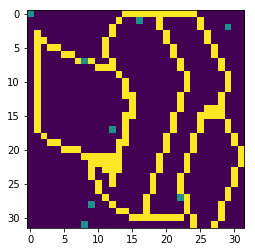

energy for iteration 5100 is 416.6979166657669


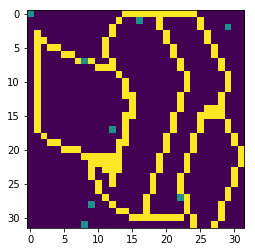

energy for iteration 5200 is 417.3385416657748


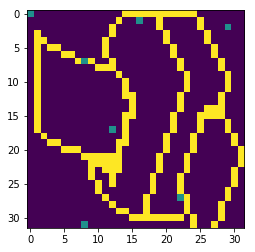

energy for iteration 5300 is 417.3385416657748


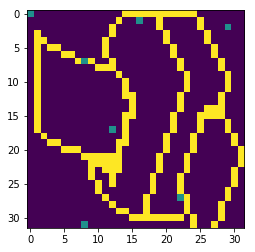

energy for iteration 5400 is 417.3385416657748


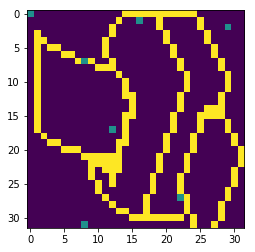

energy for iteration 5500 is 417.97916666576936


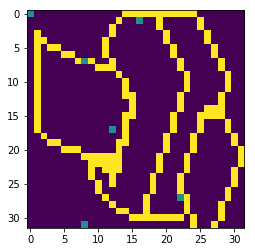

energy for iteration 5600 is 417.97916666576936


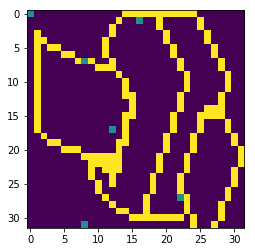

energy for iteration 5700 is 417.77343749910773


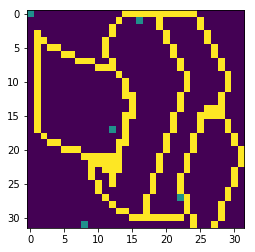

energy for iteration 5800 is 419.05468749910176


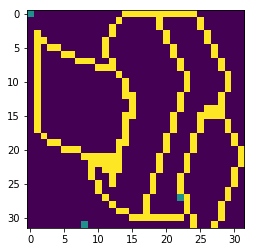

energy for iteration 5900 is 419.05468749910176


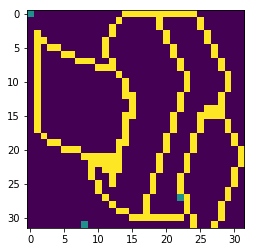

energy for iteration 6000 is 419.3489583324235


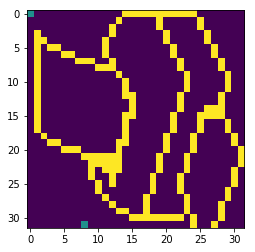

energy for iteration 6100 is 419.3489583324235


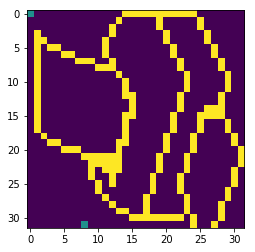

energy for iteration 6200 is 419.3489583324235


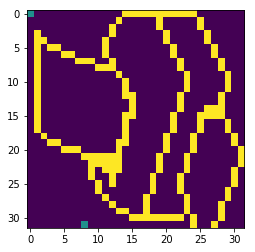

energy for iteration 6300 is 419.3489583324235


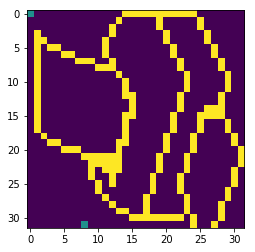

energy for iteration 6400 is 419.3489583324235


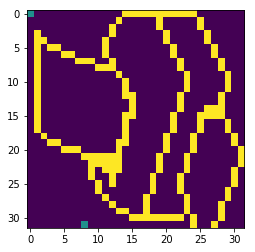

energy for iteration 6500 is 419.3489583324235


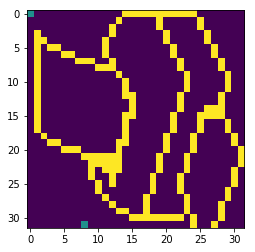

energy for iteration 6600 is 419.3489583324235


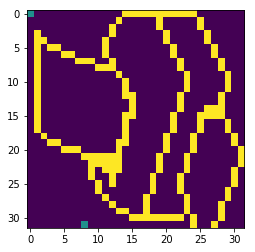

energy for iteration 6700 is 419.3489583324235


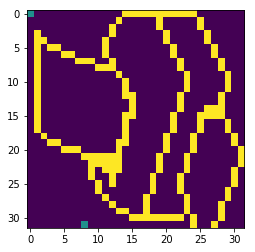

energy for iteration 6800 is 419.98958333240813


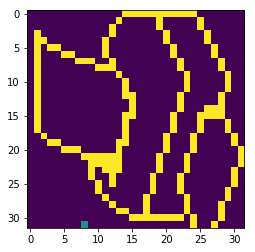

energy for iteration 6900 is 419.98958333240813


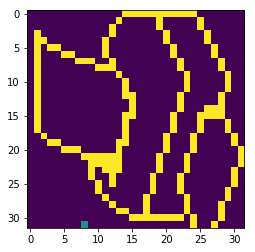

energy for iteration 7000 is 419.98958333240813


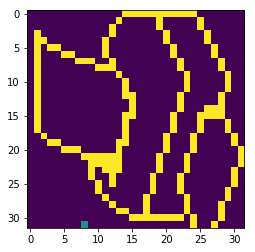

energy for iteration 7100 is 419.98958333240813


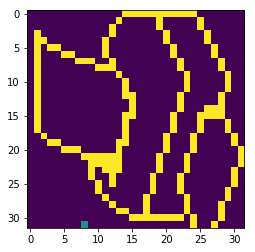

energy for iteration 7200 is 419.98958333240813


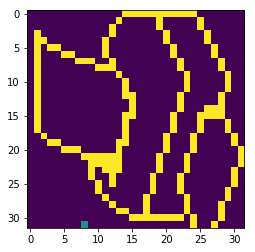

energy for iteration 7300 is 419.98958333240813


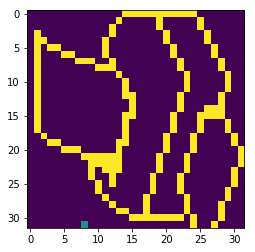

energy for iteration 7400 is 419.98958333240813


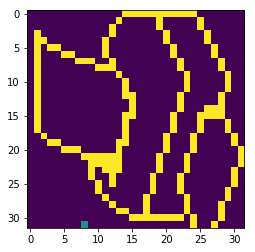

energy for iteration 7500 is 419.98958333240813


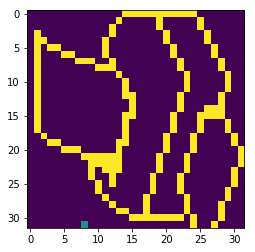

energy for iteration 7600 is 419.98958333240813


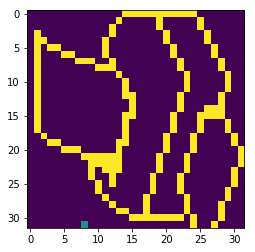

energy for iteration 7700 is 419.98958333240813


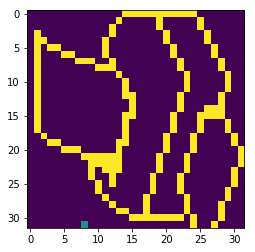

energy for iteration 7800 is 419.98958333240813


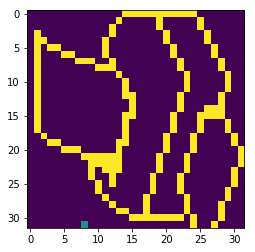

energy for iteration 7900 is 419.98958333240813


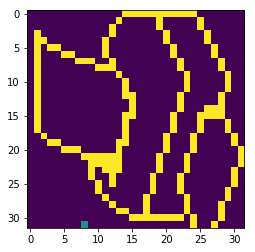

energy for iteration 8000 is 419.98958333240813


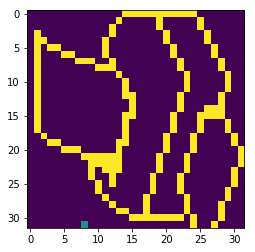

energy for iteration 8100 is 419.98958333240813


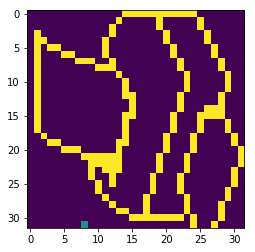

energy for iteration 8200 is 419.98958333240813


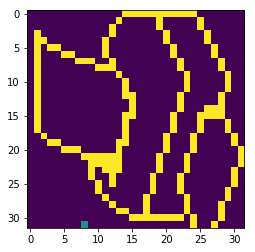

energy for iteration 8300 is 419.98958333240813


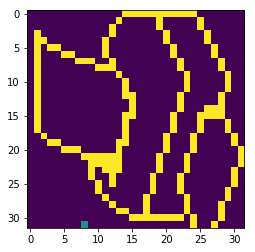

energy for iteration 8400 is 419.98958333240813


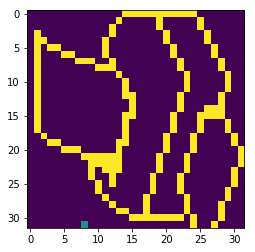

energy for iteration 8500 is 419.98958333240813


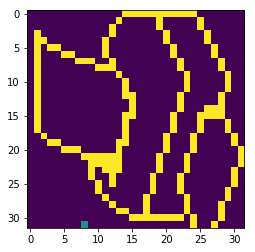

energy for iteration 8600 is 419.98958333240813


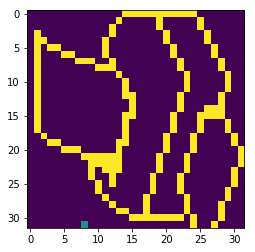

energy for iteration 8700 is 419.98958333240813


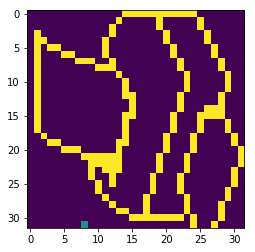

energy for iteration 8800 is 419.98958333240813


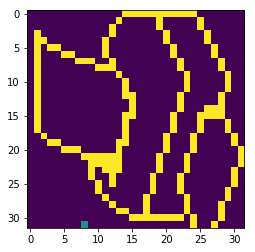

energy for iteration 8900 is 419.98958333240813


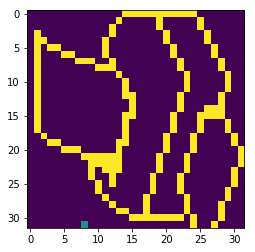

pattern matched image: 1
found after iteration: 8919
energy for iteration 8919 is 420.6302083323939


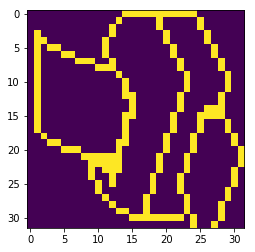

In [83]:
random_units(w_pics, data[:3,:], data[0,:])

In [20]:
def energy(w, x):
    dim = len(w)
    e = 0
    for i in range(dim):
        for j in range(dim):
            e+= w[i,j] * x[j]
            
    return -e
        
    

In [21]:
def iter_units(w, data, pattern):
    
    dim = len(w) 
    itera = 0
    gen_pattern = np.zeros(len(w))
    
      
    pred=0

    for i in range(dim):
        pred = np.dot(w[i],pattern.T)
        gen_pattern[i] = sign(pred)


    

    print("pattern matched image:", i+1)
    
    e = energy(w, gen_pattern)
    print("energy for iteration", itera, "is", e)
    plt.imshow(gen_pattern.reshape(32,32),interpolation="nearest")
    plt.show()
    return
        
        

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


pattern matched image: 1024
energy for iteration 0 is -179.17617893410602


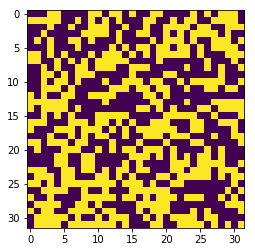

In [22]:
#Generate weights to normally distributed random numbers
dim = len(w_pics)
mu, sigma = 0, 1 # mean and standard deviation
w = np.random.normal(mu, sigma, [dim, dim])

iter_units(w, data[:3], data[0])

#Doesn't converge

In [103]:
def check_symmetric(a, tol=1e-8):
    
    return np.allclose(a, a.T, atol=tol)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


pattern matched image: 1024
found after iteration: 1
energy for iteration 1 is 12670.011999797885


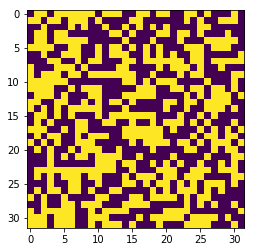

In [110]:
#Generate symmetric weight matrix

w=0.5*(np.add(w,w.T))
iter_units(w, data[0:3], data[0])

#Energy is higher, because...?

# 3.4

In [46]:
def flip_pattern(x, perc):
    ind_vec = np.random.randint(0,len(x),round(len(x)*perc))
    
    for i in range(len(ind_vec)):
        x[i] = -x[i]
        
    return x

def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    #plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return flipped
    

In [24]:
#Train a network with noise on pattern

res = []
for i in range(1,101):
    success = 0
    x = flip_pattern(data[1],i/100)
    
    recall(data[1], w_pics)
    
    
    
    if np.array_equal(data[0], pattern):
        success = 1
    res.append(success)    

#plt.plot(range(1,101),res)
#plt.show()




NameError: name 'recall' is not defined

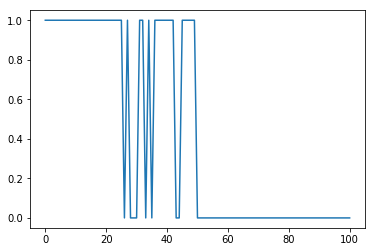

In [61]:
#perc_list = [0.1, 0.2, 0.3, 0. 0.5, 0.7, 0.85]
bool_list = []
start_ind = 2
for i in range(0, 101):
    
    x = flip(data[start_ind],i/100)
    ind = recall(x, w_pics)
    if ind == start_ind:
        bool_list.append(True)
    else:
        bool_list.append(False)

plt.plot(range(0,101), bool_list)

In [57]:
def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        solved, ind = check_True(pattern)
        if solved:
            #print ("It took:",count,"nr of iterations")
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            return ind
            
        elif np.array_equal(pattern,previousPattern):
            #print("Local minimum found in iteration:",count)
            return -1
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern):
    solved = False
    for i in range(3):
        if np.array_equal(data[i],predicted_pattern):
            #print("True! It matched pattern nr:",i)
            solved = True
    return solved, i